# LDA vs PCA Comparison

## Import libraries and set seaborn

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import pandas as pd
sns.set()

### Define Classes

In [ ]:
# 0- Setosa, 1-Veriscolour, 2-Verginica
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Veriscolour'
    else:
        return 'Virginica'

### Load Dataset

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

Calculate PCA and LDA

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda =  LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

### Percentage of variance explained for each components


In [ ]:
print("explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_) )

explained variance ratio (first two components): [0.92461872 0.05306648]


### Plot Transform with PCA and LDA

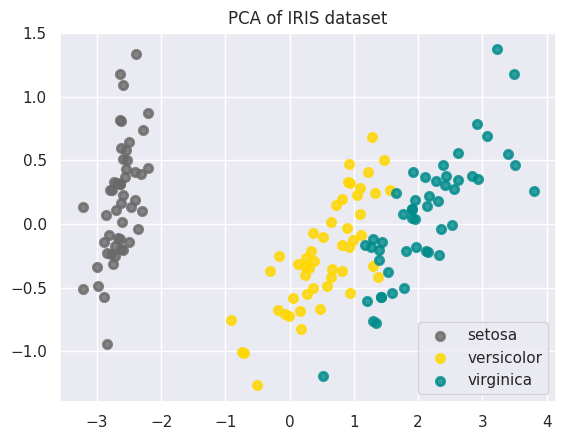

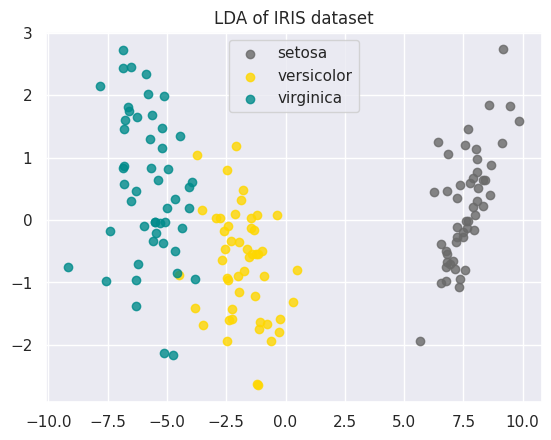

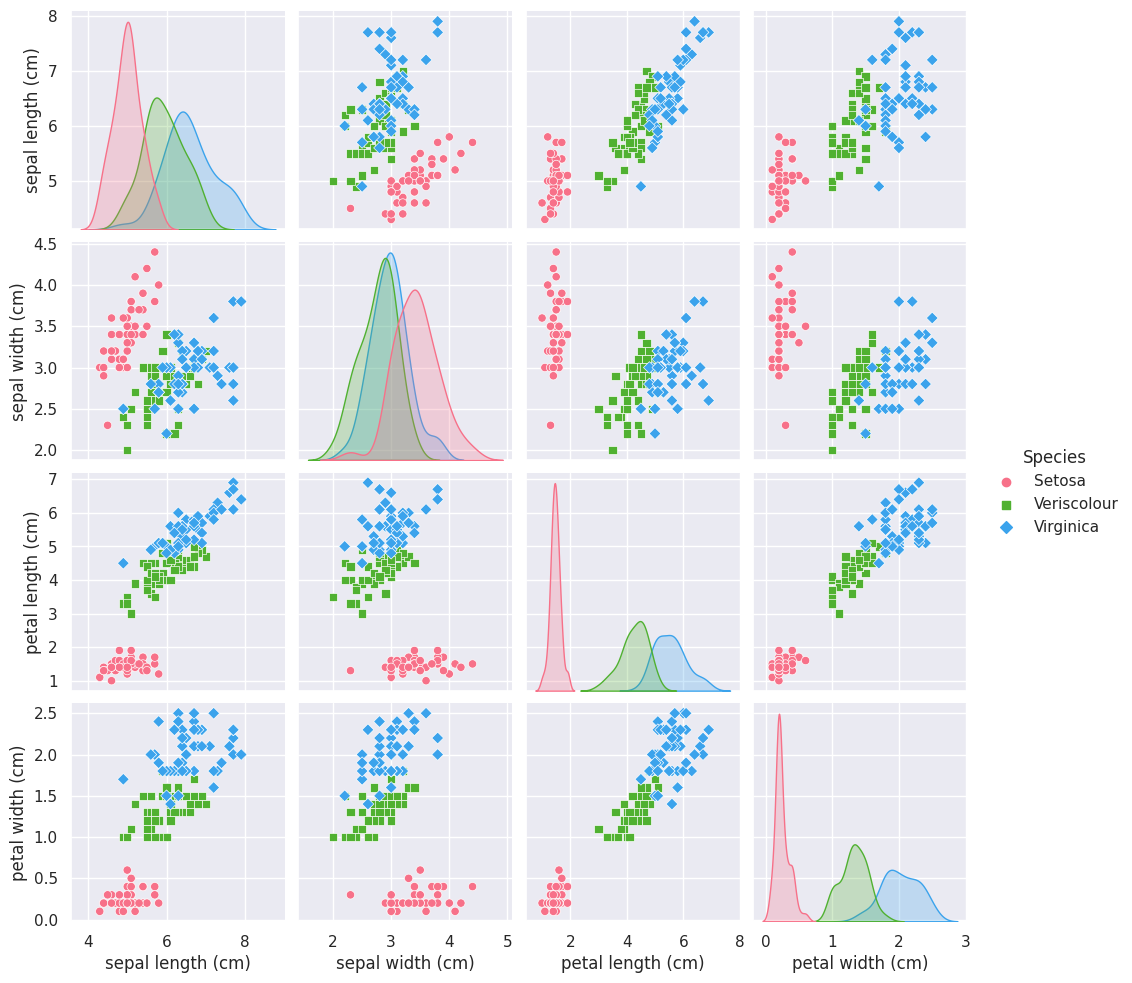

In [ ]:
plt.figure()
colors = ["dimgray", "gold", "darkcyan"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter( X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter( X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["Species"] = iris.target
df['Species'] = df['Species'].apply(flower)

p=sns.pairplot(df, hue = 'Species', palette="husl", markers=["o", "s", "D"])

plt.show()